# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import matplotlib.pyplot as plt
from collections import namedtuple, deque
%matplotlib inline

def ddpg_train(n_episodes=500, max_t=1000, print_every=100):
    scores_window = deque(maxlen=print_every)
    
    scores_list = []
    
    for i_episode in range(1, n_episodes+1):
        agents_scores = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations
        agent.reset()
        
        for t in range(max_t): 
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            agents_scores += rewards
            if any(dones):                                       # exit loop if episode finished
                break
        
        max_score = np.max(agents_scores)
        scores_list.append(max_score)
        scores_window.append(max_score)

  
        #print('\rScore (max over agents) from episode {}: {}'.format(i_episode,max_score ), end="")
        print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, max_score, np.mean(scores_window)), end="")

        if i_episode % print_every == 0:
            #print('\rScore (max over agents) from episode {}: {}'.format(i_episode, max_score))
            print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, max_score, np.mean(scores_window)))
            
        if np.mean(scores_window) >= 0.5 and i_episode >= 100:
            #print('\nEnvironment solved Score (max over agents) from episode {}: {}'.format(i_episode, max_score))
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break

    return scores_list

In [6]:
#==================================================================
#======================Main Program Call===========================
#==================================================================
import time
import pandas as pd
#from ddpg_agent import Agent
from MADDPG_agent import Agent


#================ Hyperpramters =========================

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay

ACTOR_HL_SIZE= [256, 128]         #Actor Hidden layers
CRITIC_HL_SIZE= [256, 128]        #Critic Hidden layers

start_time = time.time()          #Start Timer

model_num = "512_256_128_1e-4_3e-4"                   #Model Number

#Creating an Agent with state size and action size matching the enivorment given parameters [State = 33, actions=4]
agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

#================ Run Training =========================

scores = ddpg_train(n_episodes=1500, max_t=1000, print_every=100)

#Plot the time needed to finish the training 
print("Environment solved in {:.2f} seconds".format(time.time() - start_time))


Episode 100	Current Score: 0.00	Average Score: 0.01
Episode 200	Current Score: 0.00	Average Score: 0.01
Episode 300	Current Score: 0.00	Average Score: 0.01
Episode 400	Current Score: 0.10	Average Score: 0.05
Episode 500	Current Score: 0.10	Average Score: 0.09
Episode 600	Current Score: 0.20	Average Score: 0.07
Episode 700	Current Score: 0.10	Average Score: 0.12
Episode 800	Current Score: 0.20	Average Score: 0.11
Episode 900	Current Score: 0.20	Average Score: 0.18
Episode 1000	Current Score: 0.30	Average Score: 0.27
Episode 1100	Current Score: 1.30	Average Score: 0.23
Episode 1200	Current Score: 0.39	Average Score: 0.27
Episode 1300	Current Score: 0.79	Average Score: 0.34
Episode 1400	Current Score: 0.20	Average Score: 0.28
Episode 1500	Current Score: 0.10	Average Score: 0.29
Environment solved in 4104.60 seconds


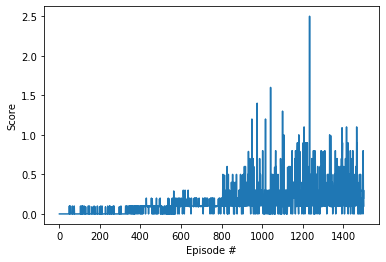

In [8]:
import torch
import os 
import pandas as pd

model_num = "512_256_128_1e-4_3e-4"                   #Model Number
#Save the agent actor-critic network models
torch.save(agent.actor_local_1.state_dict(), 'actor_model_1_{}.pth'.format(model_num))
torch.save(agent.critic_local_1.state_dict(),'critic_model_1_{}.pth'.format(model_num))
torch.save(agent.actor_local_2.state_dict(), 'actor_model_2_{}.pth'.format(model_num))
torch.save(agent.critic_local_2.state_dict(),'critic_model_2_{}.pth'.format(model_num))

#================ Plot results =========================
#Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#================ Save Results =========================
os.system(f'mkdir -p results/model-{model_num}')
df = pd.DataFrame({'episode':np.arange(len(scores)),'score':scores})
df.set_index('episode', inplace=True)
df.to_csv('results/model-{}/scores.csv'.format(model_num))

In [9]:
def run_smart_agent(agent):
    for i in range(1, 6):   
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        while True:
            actions= agent.act(states, add_noise=False)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            states = next_states
            scores += rewards
            if any(dones):                                       # exit loop if episode finished
                break
        max_score = np.max(scores)
        print("Score: {}".format(max_score))

In [6]:
import torch
from MADDPG_agent import Agent
#==================================================================
#======================Watch The Trained Agent ===========================
#==================================================================

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay

ACTOR_HL_SIZE= [256, 128]         #Actor Hidden layers
CRITIC_HL_SIZE= [256, 128]        #Critic Hidden layers


model_num = "512_256_128_1e-4_3e-4"                  #Model Number

MADDPG_agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

MADDPG_agent.actor_local_1.load_state_dict(torch.load('actor_model_1_{}.pth'.format(model_num)))
MADDPG_agent.critic_local_1.load_state_dict(torch.load('critic_model_1_{}.pth'.format(model_num)))
MADDPG_agent.actor_local_2.load_state_dict(torch.load('actor_model_2_{}.pth'.format(model_num)))
MADDPG_agent.critic_local_2.load_state_dict(torch.load('critic_model_2_{}.pth'.format(model_num)))


run_smart_agent(MADDPG_agent)

NameError: name 'run_smart_agent' is not defined

In [10]:
env.close()

In [6]:
#==================================================================
#======================Main Program Call===========================
#==================================================================
import time
import pandas as pd
#from ddpg_agent import Agent
from MADDPG_agent import Agent


#================ Hyperpramters =========================

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay

ACTOR_HL_SIZE= [256, 128]         #Actor Hidden layers
CRITIC_HL_SIZE= [256, 128]        #Critic Hidden layers

start_time = time.time()          #Start Timer

model_num = "512_256_128_1e-4_3e-4_2"                   #Model Number

#Creating an Agent with state size and action size matching the enivorment given parameters [State = 33, actions=4]
agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

#================ Run Training =========================

scores = ddpg_train(n_episodes=3000, max_t=2000, print_every=100)

#Plot the time needed to finish the training 
print("Environment solved in {:.2f} seconds".format(time.time() - start_time))


Episode 100	Current Score: 0.00	Average Score: 0.01
Episode 200	Current Score: 0.10	Average Score: 0.03
Episode 300	Current Score: 0.09	Average Score: 0.03
Episode 400	Current Score: 0.00	Average Score: 0.04
Episode 500	Current Score: 0.00	Average Score: 0.05
Episode 600	Current Score: 0.00	Average Score: 0.04
Episode 700	Current Score: 0.09	Average Score: 0.07
Episode 800	Current Score: 0.00	Average Score: 0.10
Episode 900	Current Score: 0.10	Average Score: 0.11
Episode 1000	Current Score: 0.10	Average Score: 0.18
Episode 1100	Current Score: 0.20	Average Score: 0.36
Episode 1200	Current Score: 0.30	Average Score: 0.38
Episode 1261	Current Score: 2.10	Average Score: 0.51
Environment solved in 1261 episodes!	Average Score: 0.51
Environment solved in 3182.52 seconds


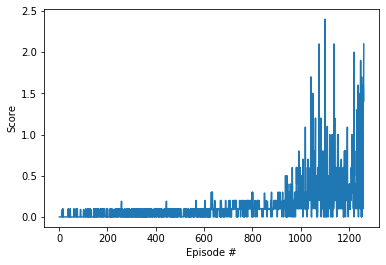

In [7]:
import torch
import os 
import pandas as pd

model_num = "512_256_128_1e-4_3e-4_2"                  #Model Number
#Save the agent actor-critic network models
torch.save(agent.actor_local_1.state_dict(), 'actor_model_1_{}.pth'.format(model_num))
torch.save(agent.critic_local_1.state_dict(),'critic_model_1_{}.pth'.format(model_num))
torch.save(agent.actor_local_2.state_dict(), 'actor_model_2_{}.pth'.format(model_num))
torch.save(agent.critic_local_2.state_dict(),'critic_model_2_{}.pth'.format(model_num))

#================ Plot results =========================
#Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#================ Save Results =========================
os.system(f'mkdir -p results/model-{model_num}')
df = pd.DataFrame({'episode':np.arange(len(scores)),'score':scores})
df.set_index('episode', inplace=True)
df.to_csv('results/model-{}/scores.csv'.format(model_num))

In [10]:
import torch
from MADDPG_agent import Agent
#==================================================================
#======================Watch The Trained Agent ===========================
#==================================================================

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay

ACTOR_HL_SIZE= [256, 128]         #Actor Hidden layers
CRITIC_HL_SIZE= [256, 128]        #Critic Hidden layers


model_num = "512_256_128_1e-4_3e-4_2"                 #Model Number

MADDPG_agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

MADDPG_agent.actor_local_1.load_state_dict(torch.load('actor_model_1_{}.pth'.format(model_num)))
MADDPG_agent.critic_local_1.load_state_dict(torch.load('critic_model_1_{}.pth'.format(model_num)))
MADDPG_agent.actor_local_2.load_state_dict(torch.load('actor_model_2_{}.pth'.format(model_num)))
MADDPG_agent.critic_local_2.load_state_dict(torch.load('critic_model_2_{}.pth'.format(model_num)))


run_smart_agent(MADDPG_agent)

Score: 0.10000000149011612
Score: 0.4000000059604645
Score: 2.600000038743019
Score: 2.7000000402331352
Score: 0.9000000134110451
